# Students

- Enrique Vílchez
- Brandon Mora
- Antonio Badilla
- Joseph Valverde

# Regresion Problem

We will solve a regression problem by trying to predict the output for a sin(x) function, which has a non linear behaviour. The loss function used is Mean Squared Error and the metric to meassure the accuracy is Mean Absolute Error.

In [1]:
from data.config import *
from data.dataset import *
from report.dumps import *
from nn.model import model
from nn.funcs import *
import numpy as np

def test(nn, ds, verbose=False, phase="Validation", acc_func=batch_hits):
    ds.reset()
    hits = 0
    mean_loss = 0
    while not(ds.iter_done()):
        x, y = ds.next()
        o, batch_loss = nn.forward(x, y, train=False)
        hits += np.sum(acc_func(o, y))
        mean_loss += np.sum(batch_loss)
        #if verbose:
        #    print("Loss: " + str(mean_loss), " Predicted: " + str(o), " Expected: " + str(y))
    accuracy = float(hits) / float(ds.size)
    mean_loss = float(mean_loss) / float(ds.size)
    if verbose:
        print(f"{phase} Accuracy: {str(accuracy)} Mean Loss {str(mean_loss)}")
    return accuracy, mean_loss

def train(nn, hp, val_hist, train_hist, logger, acc_func=batch_hits):
    cur_epoch = 1
    cur_iter = 1
    for i in range(1, hp.epochs+1):
        train_loss = 0
        hits = 0
        cur_trained = 0
        while not(hp.ds_train.iter_done()):
            x, y = hp.ds_train.next()
            #print(y)
            o, batch_loss = nn.forward(x, y)
            nn.backward(y,o)
            nn.update(hp.lr)

            hits += np.sum(acc_func(o, y))
            cur_trained += len(x)
            train_loss += np.sum(batch_loss)

            if cur_iter % hp.validate_every_no_of_batches == 0:

                train_accuracy = float(hits) / float(cur_trained)
                train_loss = float(train_loss) / float(cur_trained)
                train_hist.add(cur_iter, train_loss, train_accuracy)
                logger.write( (cur_epoch, "Training", cur_iter, train_accuracy, train_loss) )
                hits = 0
                train_loss = 0

                val_accuracy, val_loss = test(nn, hp.ds_val, True, acc_func=acc_func)
                val_hist.add(cur_iter, val_loss, val_accuracy)
                logger.write( (cur_epoch, "Val", cur_iter, val_accuracy, val_loss) )
            cur_iter+=1
        cur_epoch+=1
        hp.ds_train.reset()
    return val_hist

# Sigmoid

This is the regression problem solved with sigmoid activations.

(160, 1) (160, 1)
(40, 1) (40, 1)
Validation Accuracy: 0.6840148593899236 Mean Loss 0.5506852163655687
Validation Accuracy: 0.6118920424559576 Mean Loss 0.4867681847358637
Validation Accuracy: 0.6313807619939603 Mean Loss 0.47380196316255707
Validation Accuracy: 0.5722007454757453 Mean Loss 0.44911872122011925
Validation Accuracy: 0.5823763291614178 Mean Loss 0.4090181010349382
Validation Accuracy: 0.5414718656645062 Mean Loss 0.375853201156447
Validation Accuracy: 0.5333721155276387 Mean Loss 0.34848138156480335
Validation Accuracy: 0.5248095907865773 Mean Loss 0.32932453613728435
Validation Accuracy: 0.4650770568055921 Mean Loss 0.2937093912264805
Validation Accuracy: 0.4713688712476234 Mean Loss 0.26402064053379337
Validation Accuracy: 0.4789597043102495 Mean Loss 0.28901761761619543
Validation Accuracy: 0.40267644159522104 Mean Loss 0.19655885717870686
Validation Accuracy: 0.38070351697062516 Mean Loss 0.17437410449226048
Validation Accuracy: 0.36836626047209287 Mean Loss 0.1693586

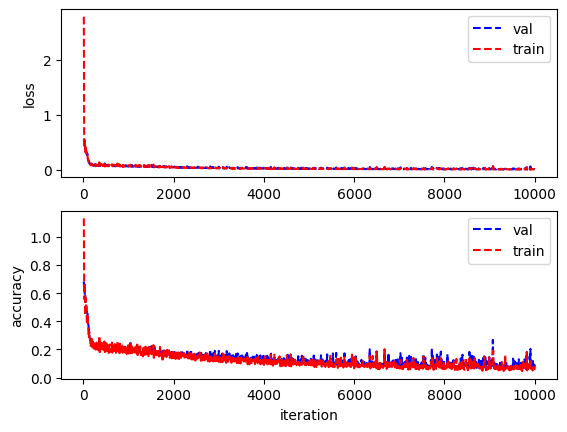

In [2]:
hp = hyperparams(ConfigEnum.SIN)

nn = model(hp.input_size, hp.output_size, hp.hidden_shapes, sigmoid, sigmoid_grad, has_dropout=hp.has_dropout, dropout_perc=hp.dropout_perc, loss_type="mse")

val_hist = historian()
train_hist = historian()
logger = nnlogger(hp.output_log, ("Epoch", "Phase", "Iteration", "Accuracy", "Loss") )
train(nn, hp, val_hist, train_hist, logger, acc_func=mean_absolute_error)
test(nn=nn, ds=hp.ds_test, verbose=True, phase="Test", acc_func=mean_absolute_error)
nnplotter.view(val_hist, train_hist) #see results on plot
logger.close()

# Tanh

This is the regression problem solved with tanh activations.

Validation Accuracy: 0.19944105178829866 Mean Loss 0.058416330372867364
Validation Accuracy: 0.18583680529883137 Mean Loss 0.06650705489709825
Validation Accuracy: 0.16118709818877103 Mean Loss 0.051345500428462
Validation Accuracy: 0.15086092320828182 Mean Loss 0.05081597049429136
Validation Accuracy: 0.1956092026774981 Mean Loss 0.06464211909550585
Validation Accuracy: 0.15848796284718225 Mean Loss 0.04295179299840189
Validation Accuracy: 0.16880265443730544 Mean Loss 0.04190594244823432
Validation Accuracy: 0.14413126252785063 Mean Loss 0.035722881339409554
Validation Accuracy: 0.14296480224210267 Mean Loss 0.03421653474531329
Validation Accuracy: 0.15016270539502802 Mean Loss 0.0340852385284216
Validation Accuracy: 0.14494113280459467 Mean Loss 0.031086407882473466
Validation Accuracy: 0.18094223497956308 Mean Loss 0.04876304284172874
Validation Accuracy: 0.21416405668820532 Mean Loss 0.07372821699429385
Validation Accuracy: 0.13198293680079803 Mean Loss 0.026044106414814493
Valida

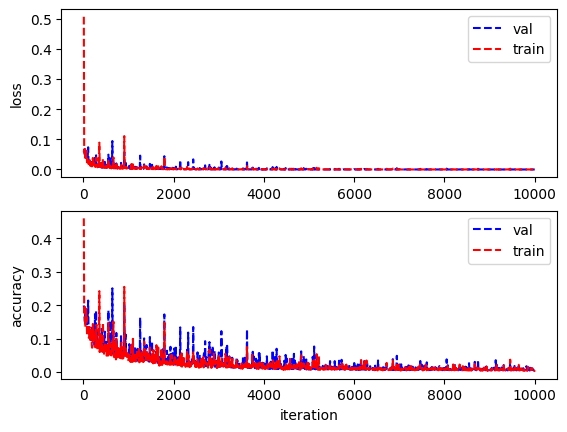

In [3]:
hp = hyperparams(ConfigEnum.SIN)

nn = model(hp.input_size, hp.output_size, hp.hidden_shapes, tanh, tanh_grad, has_dropout=hp.has_dropout, dropout_perc=hp.dropout_perc, loss_type="mse")

val_hist = historian()
train_hist = historian()
logger = nnlogger(hp.output_log, ("Epoch", "Phase", "Iteration", "Accuracy", "Loss") )
train(nn, hp, val_hist, train_hist, logger, acc_func=mean_absolute_error)
test(nn, hp.ds_test, verbose=True, phase="Test", acc_func=mean_absolute_error)
nnplotter.view(val_hist, train_hist) #see results on plot
logger.close()

# Tanh Numpy

This is the regression problem solved with numpy tanh activations.

Validation Accuracy: 0.4522869466356969 Mean Loss 0.24866396461855816
Validation Accuracy: 0.24906810627628 Mean Loss 0.09755811660953981
Validation Accuracy: 0.23638831674788477 Mean Loss 0.08438626473618102
Validation Accuracy: 0.19835477905261215 Mean Loss 0.06103591700668193
Validation Accuracy: 0.18701203340175263 Mean Loss 0.062123457260187344
Validation Accuracy: 0.22681079738654417 Mean Loss 0.06796276258304443
Validation Accuracy: 0.24418728259065237 Mean Loss 0.07950959064553795
Validation Accuracy: 0.1478030132131828 Mean Loss 0.045101426865640656
Validation Accuracy: 0.15813022106934244 Mean Loss 0.04138233186806651
Validation Accuracy: 0.14699516129909396 Mean Loss 0.03830484092836926
Validation Accuracy: 0.21512476346564421 Mean Loss 0.0677475750886258
Validation Accuracy: 0.17748074266148173 Mean Loss 0.046040618884078635
Validation Accuracy: 0.2966535830575763 Mean Loss 0.12522057403896594
Validation Accuracy: 0.16460500455182897 Mean Loss 0.041183388048870125
Validatio

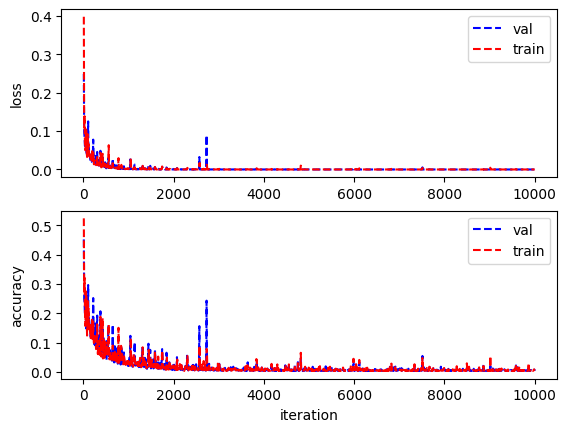

In [4]:
hp = hyperparams(ConfigEnum.SIN)

nn = model(hp.input_size, hp.output_size, hp.hidden_shapes, tanh_np, tanh_grad_np, has_dropout=hp.has_dropout, dropout_perc=hp.dropout_perc, loss_type="mse")

val_hist = historian()
train_hist = historian()
logger = nnlogger(hp.output_log, ("Epoch", "Phase", "Iteration", "Accuracy", "Loss") )
train(nn, hp, val_hist, train_hist, logger, acc_func=mean_absolute_error)
test(nn, hp.ds_test, verbose=True, phase="Test", acc_func=mean_absolute_error)
nnplotter.view(val_hist, train_hist) #see results on plot
logger.close()